In [1]:
!pip install pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 872 kB 39.3 MB/s 
     |████████████████████████████████| 1.8 MB 43.3 MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=ccb184426d6b1f06915932b8b24db539331edea8e16016ed951ce1e8716c389e
  Stored in directory: /root/.cache/pip/wheels/f3/af/8c/5dd7553522d74c52a7813806fc7ee1a9caa20a3f7c8fd850d5
Successfully built theano-pymc


In [18]:
import arviz as az
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import pymc3 as pm

In [6]:
# Подколючаем доступ к Google-Диску
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/flats.csv")
data.head()

,Unnamed: 0,price_doc,full_sq,life_sq,num_room,kitch_sq
0,8056,2750000,11,11.0,1.0,12.0
1,8154,7100000,45,27.0,2.0,6.0
2,8287,11700000,77,50.0,3.0,8.0
3,8387,10400000,56,29.0,2.0,10.0
4,8391,6200000,31,21.0,1.0,5.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6042 entries, 0 to 6041
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6042 non-null   int64  
 1   price_doc   6042 non-null   int64  
 2   full_sq     6042 non-null   int64  
 3   life_sq     6042 non-null   float64
 4   num_room    6042 non-null   float64
 5   kitch_sq    6042 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 283.3 KB


In [10]:
data.describe()

,Unnamed: 0,price_doc,full_sq,life_sq,num_room,kitch_sq
count,6042.000000,6.042000e+03,6042.000000,6042.000000,6042.000000,6042.000000
mean,19846.990070,8.750423e+06,53.374545,33.198941,1.997021,7.391096
std,6081.011373,6.277290e+06,24.011941,20.190005,0.889523,3.806198
min,8056.000000,5.000000e+05,1.000000,0.000000,0.000000,0.000000
25%,14573.250000,5.800000e+06,38.000000,20.000000,1.000000,5.000000
50%,19871.500000,7.400000e+06,46.000000,29.000000,2.000000,7.000000
75%,25147.750000,1.050000e+07,63.000000,42.000000,3.000000,9.000000
max,30470.000000,9.512250e+07,637.000000,637.000000,17.000000,96.000000


## Подготовка данных

In [16]:
data = data[['full_sq', 'life_sq', 'num_room', 'kitch_sq', 'price_doc']]
data['full_sq'] = data['full_sq'] * 1.0
data.sample(5)

,full_sq,life_sq,num_room,kitch_sq,price_doc
3769,64.0,38.0,3.0,8.0,10500000
1134,59.0,44.0,3.0,6.0,8000000
5445,73.0,42.0,3.0,9.0,7000000
846,66.0,29.0,2.0,9.0,8300000
5397,65.0,61.0,2.0,10.0,11435416


In [17]:
data.describe()

,full_sq,life_sq,num_room,kitch_sq,price_doc
count,6042.000000,6042.000000,6042.000000,6042.000000,6.042000e+03
mean,53.374545,33.198941,1.997021,7.391096,8.750423e+06
std,24.011941,20.190005,0.889523,3.806198,6.277290e+06
min,1.000000,0.000000,0.000000,0.000000,5.000000e+05
25%,38.000000,20.000000,1.000000,5.000000,5.800000e+06
50%,46.000000,29.000000,2.000000,7.000000,7.400000e+06
75%,63.000000,42.000000,3.000000,9.000000,1.050000e+07
max,637.000000,637.000000,17.000000,96.000000,9.512250e+07


In [43]:
data[data["life_sq"]==0]

,full_sq,life_sq,num_room,kitch_sq,price_doc
5276,77.0,0.0,1.0,1.0,8758453


In [44]:
data[data["num_room"]==0]

,full_sq,life_sq,num_room,kitch_sq,price_doc
4590,30.0,18.0,0.0,6.0,1000000


In [65]:
data[data["kitch_sq"]==0].head(5)

,full_sq,life_sq,num_room,kitch_sq,price_doc
10,3.610918,18.0,1.0,0.0,15.607270
340,3.688879,18.0,1.0,0.0,15.343383
352,4.060443,58.0,2.0,0.0,16.206260
385,4.094345,60.0,2.0,0.0,15.481741
492,5.105945,165.0,4.0,0.0,16.848106


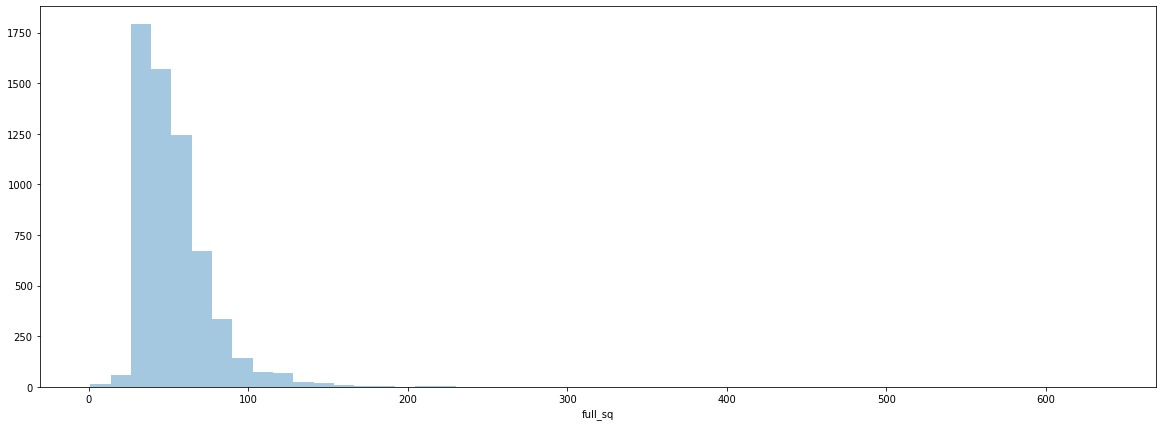

In [31]:
# Гистограмма распределения full_sq 
plt.rcParams["figure.figsize"] = (20, 7)
sns.distplot(data["full_sq"], kde=False)
plt.show()

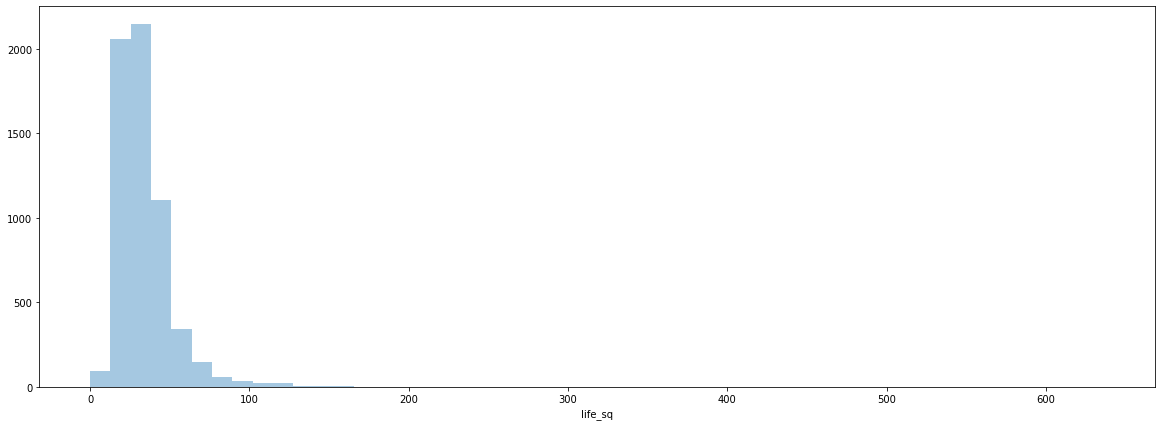

In [33]:
# Гистограмма распределения life_sq 
plt.rcParams["figure.figsize"] = (20, 7)
sns.distplot(data["life_sq"], kde=False)
plt.show()

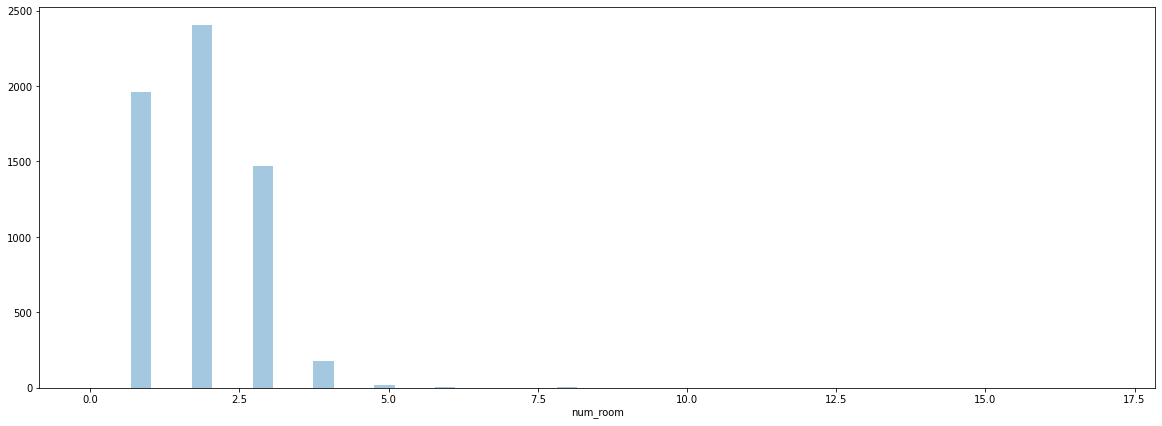

In [32]:
# Гистограмма распределения num_room
plt.rcParams["figure.figsize"] = (20, 7)
sns.distplot(data["num_room"], kde=False)
plt.show()

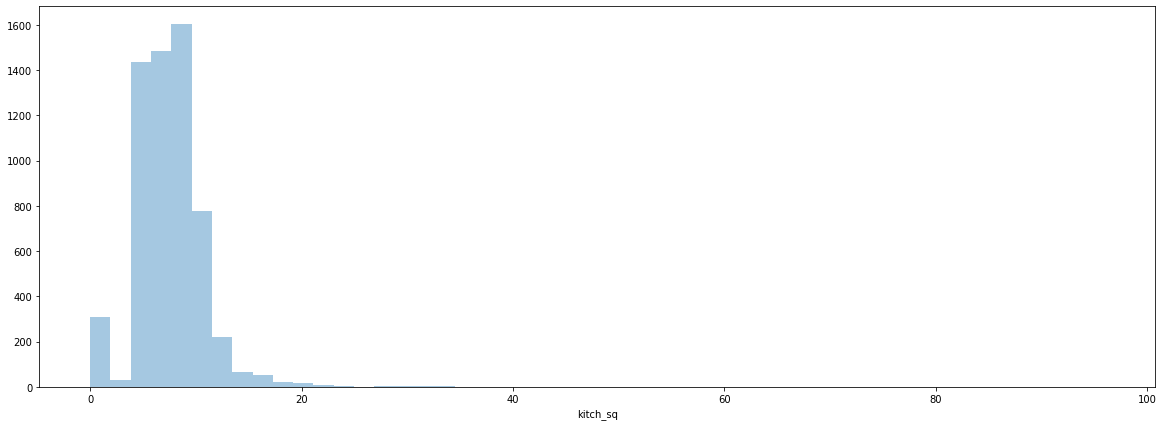

In [34]:
# Гистограмма распределения kitch_sq
plt.rcParams["figure.figsize"] = (20, 7)
sns.distplot(data["kitch_sq"], kde=False)
plt.show()

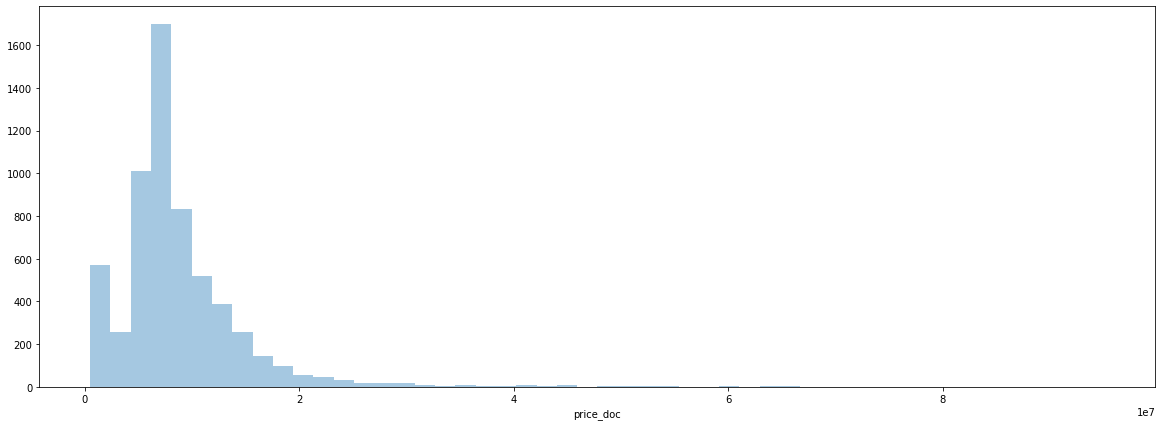

In [25]:
# Гистограмма распределения целевой переменной price_doc
plt.rcParams["figure.figsize"] = (20, 7)
sns.distplot(data["price_doc"], kde=False)
plt.show()

Все указанные признаки и целевая переменная имеют распределение, сильно похожее на логнормальное распределение (при логарифмировании которого - можно получить нормальное распределение). Среди признаков life_sq, num_room, kitch_sq - имеются 0 значения, к которым нельзя применять логарифмирование. 

Поскольку наш датасет относительно небольшой (чуть более 6.000) - убирать данные с 0 значениями признаков для дальнейшего логарифмирования не будем.
А целевую переменную price_doc и full_sq - будем. 

В таком случае, если нам будет нужно предсказывать цену квартиры - мы должны будем провести операцию, обратную логарифмированию (степень экспоненты).

In [46]:
data["price_doc"] = np.log(data["price_doc"])
data["full_sq"] = np.log(data["full_sq"])
data.head()

,full_sq,life_sq,num_room,kitch_sq,price_doc
0,2.397895,11.0,1.0,12.0,14.827111
1,3.806662,27.0,2.0,6.0,15.775605
2,4.343805,50.0,3.0,8.0,16.275099
3,4.025352,29.0,2.0,10.0,16.157316
4,3.433987,21.0,1.0,5.0,15.640060


We recommend to instead use Bambi https://bambinos.github.io/bambi/
/usr/local/lib/python3.7/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


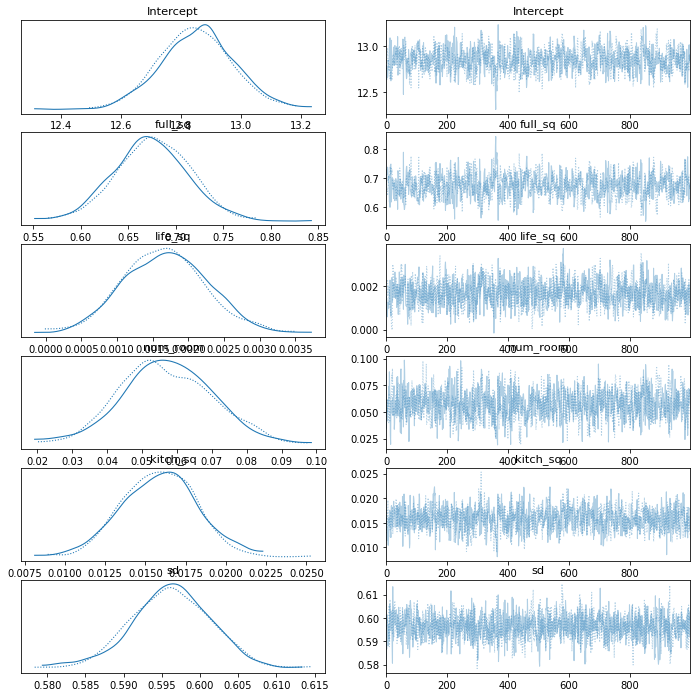

In [48]:
with pm.Model() as linear_model:
    pm.glm.GLM.from_formula('price_doc ~ full_sq + life_sq + num_room + kitch_sq ', data, family = pm.glm.families.Normal())
    trace = pm.sample(1000)
    
az.plot_trace(trace);

In [68]:
pm.summary(trace)

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,12.853,0.121,12.622,13.077,0.005,0.003,636.0,907.0,1.01
full_sq,0.675,0.039,0.605,0.749,0.002,0.001,603.0,888.0,1.01
life_sq,0.002,0.001,0.001,0.003,0.000,0.000,1009.0,1170.0,1.00
num_room,0.057,0.013,0.033,0.082,0.000,0.000,954.0,872.0,1.00
kitch_sq,0.016,0.002,0.012,0.020,0.000,0.000,1021.0,1028.0,1.00
sd,0.596,0.005,0.586,0.606,0.000,0.000,1376.0,972.0,1.00


## Сравнение с Линейной регрессией из sklearn

In [61]:
# Строим линейную регрессию sklearn на тех же признаках, что и байесовскую
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(data[['full_sq', 'life_sq',  'num_room', 'kitch_sq']], data['price_doc'])

LinearRegression()

In [62]:
lr.intercept_

12.84203114791504

In [64]:
pd.DataFrame(lr.coef_, index=['full_sq', 'life_sq',  'num_room', 'kitch_sq'])

,0
full_sq,0.678830
life_sq,0.001630
num_room,0.056558
kitch_sq,0.015694


Видно, что коэффициенты (значения mean из pm.summary(trace) и lr.coef_) очень близки друг к другу, что говорит о верном построении модели байесовской линейной регрессии